# IV. Optimization

### Optimization

-  Find the $W$ that minimizes the loss, i.e. $W^\ast = \text{arg} \min\limits_W L$

    -  Problem: Difficult. We only focus on the basics

-  School: Gradient $\overset{!}{=}$ $0$ & check Hessian $\mathcal{H}$
    -  Example: $0 = \text{arg} \min x^2$
    -  Problem: Machine power intense

### Recap from math course:

Find minima and maxima (recipe)

1. $\nabla_xf \overset{!}{=} 0$


2. $\mathcal{H} \; \begin{cases} > 0 & \text{minimum} \\ < 0 & \text{maximum} \\ \text{else} & \text{saddlepoint} \end{cases}$

### Recap: Positive/negative definite

-  A $m \times m$ matrix M is positive definite if the leading principal minors are positive. We write $M>0$.

-  A $m \times m$ matrix M is negative definite if the leading principal minors are negative. We write $M<0$.

-  Not relevant for this course, but for completion:
    - positive semi-definite if "$\geq 0$". We write $M\geq 0$.
    - negative semi-definite if "$\leq 0$". We write $M\leq 0$.

### Recap: Principle Minors (Example)

Let $M = \begin{pmatrix} m_{1,1} & m_{1,2} & m_{1,3} \\
                         m_{2,1} & m_{2,2} & m_{2,3} \\
                         m_{3,1} & m_{3,2} & m_{3,3} \end{pmatrix}$. The principal minors are then given by

- $M_{1,1} = \text{det}(m_{1,1}) = m_{1,1}$
- $M_{2,2} = \text{det} \begin{pmatrix} m_{1,1} & m_{1,2}\\
                         m_{2,1} & m_{2,2} \end{pmatrix} = m_{1,1}\cdot m_{2,2} - m_{1,2}\cdot m_{2,1}$
- $M_{3,3} = \text{det}(M)$



### Recap from math course:

Recap: Let $f:\mathbb{R}^n \rightarrow \mathbb{R},$ $x \mapsto f(x)$. Then...

-  $\nabla_xf \equiv \dfrac{\partial f}{\partial x} \equiv \sum\limits_i \dfrac{\partial f}{\partial x_i} \text{e}_i = \begin{pmatrix} \dfrac{\partial f}{\partial x_1} & \cdots & \dfrac{\partial f}{\partial x_n} \end{pmatrix}'$


-  $\mathcal{H}_f \equiv \begin{pmatrix}
\dfrac{\partial f}{\partial^2 x_1} & \dfrac{\partial f}{\partial x_1 \partial x_2} & \cdots & \dfrac{\partial f}{\partial x_1 \partial x_n} \\
\dfrac{\partial f}{\partial x_2 \partial x_1} & \dfrac{\partial f}{\partial^2 x_2} &  \cdots & \dfrac{\partial f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial f}{\partial x_n \partial x_1} & \dfrac{\partial f}{\partial x_n \partial x_2} &  \cdots  & \dfrac{\partial f}{\partial^2 x_n}
\end{pmatrix}$

### Example:

Find the extreme values of

-  $h_1:\mathbb{R} \to \mathbb{R}, x \mapsto x^2 \leadsto 0$

-  $h_2:\mathbb{R}^2 \to \mathbb{R}, \; \begin{pmatrix} x \\ y \end{pmatrix} \mapsto x^2 + y^2 \leadsto \begin{pmatrix} 0 \\ 0 \end{pmatrix}$

### Example: EXERCISE TIME

Find the extreme values of

-  $f:\mathbb{R}^2 \to \mathbb{R}, \; \begin{pmatrix} x \\ y \end{pmatrix} \mapsto 2xy - 5x^2 + 4x - 2y - 4$


-  $g:\mathbb{R}^2 \to \mathbb{R}, \; \begin{pmatrix} x \\ y \end{pmatrix} \mapsto \text{e}^{xy+x^2+y^2} $ (without checking Hessian)

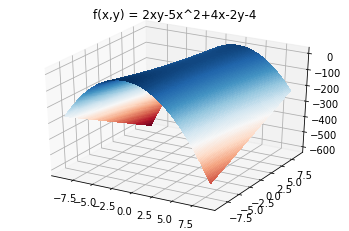

In [5]:
from numpy import arange
from pylab import meshgrid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt


def f(x,y):
 return 2*x*y - 5*x**2 + 4*x - 2*y - 4
 
x = arange(-9, 9, 0.1)
y = arange(-9, 9, 0.1)
X,Y = meshgrid(x, y)
Z = f(X, Y) 

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, antialiased=False)
ax.set_title('f(x,y) = 2xy-5x^2+4x-2y-4')

plt.show()

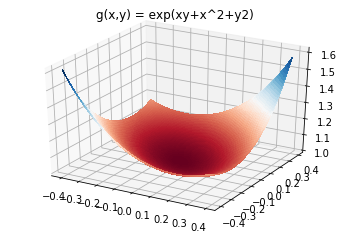

In [20]:
import numpy as np
from numpy import arange
from pylab import meshgrid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

def g(x,y):
 return np.exp(x*y + x**2 + y**2)
 
x = arange(-0.4, 0.4, 0.01)
y = arange(-0.4, 0.4, 0.01)
X,Y = meshgrid(x, y)
Z = g(X, Y) 

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, antialiased=False)
ax.set_title('g(x,y) = exp(xy+x^2+y2)')

plt.show()

### Remember: Machine Power intense

-  MNIST: Each image is represented by a $784 \times 1$ vector


-  $\mathcal{H}$ is $784 \times 784$ 


-  intense, despite symmetry of $\mathcal{H}$

### Gradient Descent

-  We will "follow the slope" instead


-  Recap: $\nabla_xf $ points towards the direction of greatest increase


-  Example: $f(x) = x^2$

### Gradient Descent: Algorithm
$L(W) = \frac{1}{D} \sum\limits_d L_d (y_{[d]},X,W)$

$\nabla_W L(W) = \frac{1}{D}\sum\limits_d \nabla_W L_d (y_{[d]},X,W)$

$W_{t+1} = W_t - \eta \cdot \nabla_W L(W_t) \equiv W_t + \Delta W_t$

   - $\eta$ ($=\eta_t$) is the learning rate
   - $W_0$ is the initial value

### Gradient Descent: Coding

-  $f(x,y) = x^2 + y^2$

-  $x_0 = y_ 0 = 3$

-  $\eta = 0.01$

Note: You might consider a stopping rule

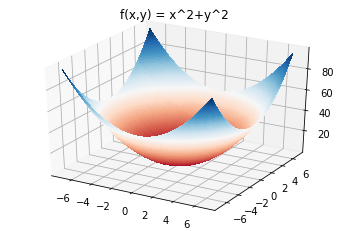

In [2]:
from numpy import arange
from pylab import meshgrid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt


def f(x,y):
 return x**2 + y**2
 
x = arange(-7, 7, 0.1)
y = arange(-7, 7, 0.1)
X,Y = meshgrid(x, y)
Z = f(X, Y) 

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, antialiased=False)
ax.set_title('f(x,y) = x^2+y^2')

plt.show()

In [2]:
import numpy as np

x_t = np.array([3 , 3])
eta = 0.01 # Learning rate
precision = 0.000001 
improvement = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0

def f(x,y): #function f
    return x**2 + y**2

def df(x,y): #Gradient of f
    return np.array([2*x, 2*y])

print("Iteration",0 ,
      "\nx = ",x_t ,
     "\nf = ",f(x_t[0],x_t[1]) ) #Print iterations

while improvement > precision and iters < max_iters:
    prev_x = x_t #Store current x value in prev_x
    x_t = prev_x - eta * df(prev_x[0],prev_x[1]) #Grad descent
    improvement = np.linalg.norm(x_t - prev_x) #Change in x using L_2
    iters = iters+1 #iteration count
    print("Iteration",iters,
          "\nx = ",x_t,
         "\nf = ",f(x_t[0],x_t[1]) ) #Print iterations
    
print("The approx. minumum occurs at", x_t)



# Learning rate:
# 0.01 slowly approaching
# 0.1  approaching
# 1    "jumping"
# 0.1  "jumpying" with decreasing

Iteration 0 
x =  [3 3] 
f =  18
Iteration 1 
x =  [2.94 2.94] 
f =  17.2872
Iteration 2 
x =  [2.8812 2.8812] 
f =  16.60262688
Iteration 3 
x =  [2.823576 2.823576] 
f =  15.945162855551995
Iteration 4 
x =  [2.76710448 2.76710448] 
f =  15.313734406472136
Iteration 5 
x =  [2.71176239 2.71176239] 
f =  14.70731052397584
Iteration 6 
x =  [2.65752714 2.65752714] 
f =  14.124901027226395
Iteration 7 
x =  [2.6043766 2.6043766] 
f =  13.56555494654823
Iteration 8 
x =  [2.55228907 2.55228907] 
f =  13.028358970664922
Iteration 9 
x =  [2.50124329 2.50124329] 
f =  12.51243595542659
Iteration 10 
x =  [2.45121842 2.45121842] 
f =  12.016943491591697
Iteration 11 
x =  [2.40219405 2.40219405] 
f =  11.541072529324664
Iteration 12 
x =  [2.35415017 2.35415017] 
f =  11.084046057163405
Iteration 13 
x =  [2.30706717 2.30706717] 
f =  10.645117833299736
Iteration 14 
x =  [2.26092582 2.26092582] 
f =  10.223571167101067
Iteration 15 
x =  [2.21570731 2.21570731] 
f =  9.818717748883865
Iter

Iteration 247 
x =  [0.02041559 0.02041559] 
f =  0.000833592689365666
Iteration 248 
x =  [0.02000728 0.02000728] 
f =  0.0008005824188667855
Iteration 249 
x =  [0.01960713 0.01960713] 
f =  0.000768879355079661
Iteration 250 
x =  [0.01921499 0.01921499] 
f =  0.0007384317326185064
Iteration 251 
x =  [0.01883069 0.01883069] 
f =  0.0007091898360068136
Iteration 252 
x =  [0.01845408 0.01845408] 
f =  0.0006811059185009437
Iteration 253 
x =  [0.018085 0.018085] 
f =  0.0006541341241283065
Iteration 254 
x =  [0.0177233 0.0177233] 
f =  0.0006282304128128256
Iteration 255 
x =  [0.01736883 0.01736883] 
f =  0.0006033524884654377
Iteration 256 
x =  [0.01702145 0.01702145] 
f =  0.0005794597299222065
Iteration 257 
x =  [0.01668102 0.01668102] 
f =  0.0005565131246172872
Iteration 258 
x =  [0.0163474 0.0163474] 
f =  0.0005344752048824426
Iteration 259 
x =  [0.01602046 0.01602046] 
f =  0.0005133099867690977
Iteration 260 
x =  [0.01570005 0.01570005] 
f =  0.0004929829112930416
It

x =  [0.0002652 0.0002652] 
f =  1.4065865003264017e-07
Iteration 463 
x =  [0.00025989 0.00025989] 
f =  1.350885674913476e-07
Iteration 464 
x =  [0.00025469 0.00025469] 
f =  1.2973906021869022e-07
Iteration 465 
x =  [0.0002496 0.0002496] 
f =  1.246013934340301e-07
Iteration 466 
x =  [0.00024461 0.00024461] 
f =  1.1966717825404254e-07
Iteration 467 
x =  [0.00023972 0.00023972] 
f =  1.1492835799518244e-07
Iteration 468 
x =  [0.00023492 0.00023492] 
f =  1.1037719501857322e-07
Iteration 469 
x =  [0.00023022 0.00023022] 
f =  1.0600625809583773e-07
Iteration 470 
x =  [0.00022562 0.00022562] 
f =  1.0180841027524257e-07
Iteration 471 
x =  [0.00022111 0.00022111] 
f =  9.777679722834296e-08
Iteration 472 
x =  [0.00021669 0.00021669] 
f =  9.390483605810058e-08
Iteration 473 
x =  [0.00021235 0.00021235] 
f =  9.018620455019979e-08
Iteration 474 
x =  [0.0002081 0.0002081] 
f =  8.661483085001189e-08
Iteration 475 
x =  [0.00020394 0.00020394] 
f =  8.318488354835142e-08
Iterat

### Gradient Descent

-  Learning rate: Beyond our scope

-  Initial values: Roughly

-  Gradient: Numerically vs. analytically
    - Numerically: Slow, approximate & easy
    - Analytically: Fast, exact & difficult

### Backpropagation "Algorithm"

repeat:

1.  Feed the NN (forward propagation)
2.  Derive the gradient by backprop ("Backward propagation of errors")
3.  Optimize


### Example 1



### Example 2



### Example 3: EXERCISE TIME

